# Analyzing Player Impact in the UEFA Champions League 2021-2022: A Data-Driven Approach
## Introduction

Welcome to our comprehensive tutorial where we delve into the fascinating world of football analytics, focusing specifically on the UEFA Champions League 2021-2022 season. The Champions League, known for its high stakes and intensely competitive matches, offers a unique dataset to analyze and understand the intricacies of player performance at the highest level of club football.

In this tutorial, we will explore a dataset that captures a wide range of player statistics, from goal-scoring prowess and defensive solidity to distribution efficiency and disciplinary records. Each CSV file in our dataset—ranging from `attacking.csv` to `goals.csv` and beyond—provides detailed insights into different aspects of the game, allowing us to paint a comprehensive picture of what makes a player, or a team, stand out in one of the most prestigious tournaments in the world.

The objective of this analysis is not just to identify who the top performers are but to understand the underlying factors that contribute to successful performances in the Champions League. By employing a variety of data science techniques, from basic exploratory data analysis to advanced predictive modeling, I aim to uncover the subtle nuances that influence game outcomes and player impacts.

This tutorial will provide you with an understanding of how data-driven insights can be extracted from complex datasets. You will learn how to clean and prepare data, perform detailed statistical analysis, and develop predictive models that can forecast player performance.

As we progress, keep in mind that the tools and techniques discussed here are not only applicable to football or sports analytics but can be adapted to a wide range of domains where performance analysis is required.

We will begin by parsing through the csv files we are given.


In [740]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming all CSV files are in the same directory 'path_to_csv_files'
directory = 'archive'

# List all CSV files in the directory
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Loop through each file and print their column names
for file in csv_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    print(f"Columns in {file}:")
    print(df.columns.tolist())  # Prints list of columns in the CSV file
    print("\n")  # Adds a newline for better readability between files


Columns in attacking.csv:
['serial', 'player_name', 'club', 'position', 'assists', 'corner_taken', 'offsides', 'dribbles', 'match_played']


Columns in attempts.csv:
['serial', 'player_name', 'club', 'position', 'total_attempts', 'on_target', 'off_target', 'blocked', 'match_played']


Columns in defending.csv:
['serial', 'player_name', 'club', 'position', 'balls_recoverd', 'tackles', 't_won', 't_lost', 'clearance_attempted', 'match_played']


Columns in disciplinary.csv:
['serial', 'player_name', 'club', 'position', 'fouls_committed', 'fouls_suffered', 'red', 'yellow', 'minutes_played', 'match_played']


Columns in distributon.csv:
['serial', 'player_name', 'club', 'position', 'pass_accuracy', 'pass_attempted', 'pass_completed', 'cross_accuracy', 'cross_attempted', 'cross_complted', 'freekicks_taken', 'match_played']


Columns in goalkeeping.csv:
['serial', 'player_name', 'club', 'position', 'saved', 'conceded', 'saved_penalties', 'cleansheets', 'punches made', 'match_played']


Column


## Data Collection

### Overview
In this project, we aim to analyze the impact of players in the UEFA Champions League 2021-2022 season by exploring a comprehensive dataset that includes various performance metrics across multiple aspects of the game. This dataset is organized into several CSV files, each focusing on different areas such as attacking, defending, goalkeeping, and more. Our first task is to collect and prepare this data for in-depth analysis.

### Data Sources
The dataset is divided into eight CSV files, each providing unique insights into player performances:

1. **Attacking.csv**: Contains data on player assists, corners taken, offsides, and dribbles.
2. **Attempts.csv**: Details total attempts on goal, including shots on target, off target, and blocked shots.
3. **Defending.csv**: Offers statistics on balls recovered, tackles made, tackles won, tackles lost, and attempted clearances.
4. **Disciplinary.csv**: Records disciplinary actions, including fouls committed, fouls suffered, red cards, and yellow cards.
5. **Distributon.csv**: Focuses on passing and crossing accuracy, including total passes attempted, completed, and the accuracy of crosses.
6. **Goalkeeping.csv**: Provides data on goalkeeper performances, such as saves made, goals conceded, penalties saved, and clean sheets.
7. **Goals.csv**: Tracks the details of goals scored, including the foot used, headers, and penalties.
8. **Key_Stats.csv**: A summary file that includes overall minutes played, matches played, goals, assists, and distance covered.

### Data Retrieval Process
To begin our analysis, we will first retrieve and load this data into our Python environment using pandas, a powerful data manipulation library. Here's how we can load each file and take a preliminary look at its contents:


In [741]:
import pandas as pd

# define the path to the archive directory
archive_dir = 'archive/'

# Load each dataset
attacking = pd.read_csv(f'{archive_dir}attacking.csv')
attempts = pd.read_csv(f'{archive_dir}attempts.csv')
defending = pd.read_csv(f'{archive_dir}defending.csv')
disciplinary = pd.read_csv(f'{archive_dir}disciplinary.csv')
distribution = pd.read_csv(f'{archive_dir}distributon.csv')
goalkeeping = pd.read_csv(f'{archive_dir}goalkeeping.csv')
goals = pd.read_csv(f'{archive_dir}goals.csv')
key_stats = pd.read_csv(f'{archive_dir}key_stats.csv')

# display the first few rows of the attacking data
print("First few rows of Attacking data:")
print(attacking.head())


First few rows of Attacking data:
   serial       player_name         club    position  assists  corner_taken  \
0       1   Bruno Fernandes  Man. United  Midfielder        7            10   
1       2   Vinícius Júnior  Real Madrid     Forward        6             3   
2       2              Sané       Bayern  Midfielder        6             3   
3       4            Antony         Ajax     Forward        5             3   
4       5  Alexander-Arnold    Liverpool    Defender        4            36   

   offsides  dribbles  match_played  
0         2         7             7  
1         4        83            13  
2         3        32            10  
3         4        28             7  
4         0         9             9  


### Initial Data Review
Upon loading the data, conduct an initial review to check for:
- **Consistency in data formats**: Ensure that all data types are correctly identified, such as integers for counts and floats for percentages.
- **Missing values**: Identify if any key data points are missing and require imputation or removal.
- **Preliminary insights**: Note any interesting trends or anomalies that could warrant deeper investigation.

### Conclusion
Collecting and initially reviewing this data will set the foundation for our exploratory data analysis. Understanding the structure and quality of our data is crucial before moving forward with more detailed statistical analysis or predictive modeling.



## Data Processing

### Overview
To analyze player impact effectively, we first need to prepare our dataset, which consists of multiple CSV files located in the 'archive' directory. We'll combine these files into a comprehensive DataFrame, clean the data, and ensure it's correctly formatted for subsequent analysis.

### Libraries and Documentation
For data manipulation, we'll use Pandas and NumPy, essential libraries in Python's data science stack:
- **Pandas**: [Pandas Documentation](https://pandas.pydata.org/docs/index.html)
- **NumPy**: [NumPy Documentation](https://numpy.org/doc/stable/index.html)

### Initial Data Loading
Each CSV file represents a different aspect of player performance. We'll load these into separate DataFrames before merging them into a master DataFrame.


In [742]:
import pandas as pd

# Define the path to the archive directory
archive_dir = 'archive/'

# Load each dataset
data_files = ['attacking', 'attempts', 'defending', 'disciplinary', 'distributon', 'goalkeeping', 'goals', 'key_stats']
data_frames = {file: pd.read_csv(f'{archive_dir}/{file}.csv') for file in data_files}

# Display the first few rows of each DataFrame to verify
for name, frame in data_frames.items():
    print(f"First few rows of {name.capitalize()} data:")
    print(frame.head(), "\n")

First few rows of Attacking data:
   serial       player_name         club    position  assists  corner_taken  \
0       1   Bruno Fernandes  Man. United  Midfielder        7            10   
1       2   Vinícius Júnior  Real Madrid     Forward        6             3   
2       2              Sané       Bayern  Midfielder        6             3   
3       4            Antony         Ajax     Forward        5             3   
4       5  Alexander-Arnold    Liverpool    Defender        4            36   

   offsides  dribbles  match_played  
0         2         7             7  
1         4        83            13  
2         3        32            10  
3         4        28             7  
4         0         9             9   

First few rows of Attempts data:
   serial  player_name         club    position  total_attempts  on_target  \
0       1      Benzema  Real Madrid     Forward              45         23   
1       2        Salah    Liverpool     Forward              42         


### Data Cleaning and Merging
Our next step is to clean each DataFrame and merge them into a single DataFrame for a unified analysis base.

#### Merging Strategy
We'll merge all DataFrames on common columns such as 'player_name', 'club', and 'match_played'. This approach assumes that each player's entry across different files corresponds to the same match instances.

#### Dropping Unnecessary Columns
The 'serial' column, present in some files, does not contribute to our analysis and will be removed.

In [743]:
# remove 'serial' column from each DataFrame, if present
for name, frame in data_frames.items():
    if 'serial' in frame.columns:
        frame.drop(columns=['serial'], inplace=True)
        print(f"Dropped 'serial' from {name}.")


Dropped 'serial' from attacking.
Dropped 'serial' from attempts.
Dropped 'serial' from defending.
Dropped 'serial' from disciplinary.
Dropped 'serial' from distributon.
Dropped 'serial' from goalkeeping.
Dropped 'serial' from goals.


### Step 3: Merging DataFrames
With the individual DataFrames cleaned, we'll merge them into a single DataFrame. This is crucial for performing holistic analyses across multiple performance metrics.

In [744]:
from functools import reduce

# merge all DataFrames on common keys
def merge_dataframes(df_list):
    return reduce(lambda left, right: pd.merge(left, right, on=['player_name', 'club', 'position', 'match_played'], how='outer'), df_list)

master_df = merge_dataframes(list(data_frames.values()))
print("Master DataFrame shape:", master_df.shape)
print(master_df.head())


Master DataFrame shape: (755, 46)
  player_name      club    position  assists_x  corner_taken  offsides  \
0    Aaronson  Salzburg  Midfielder        2.0           4.0       5.0   
1   Abubakari     Malmö     Forward        NaN           NaN       NaN   
2       Acuña   Sevilla    Defender        NaN           NaN       NaN   
3       Adams   Leipzig  Midfielder        NaN           NaN       NaN   
4       Adamu  Salzburg     Forward        NaN           NaN       NaN   

   dribbles  match_played  total_attempts  on_target  ...  left_foot  headers  \
0       9.0             8             9.0        3.0  ...        NaN      NaN   
1       NaN             4             2.0        0.0  ...        NaN      NaN   
2       NaN             5             NaN        NaN  ...        NaN      NaN   
3       NaN             5             NaN        NaN  ...        NaN      NaN   
4       NaN             8             4.0        2.0  ...        0.0      0.0   

   others  inside_area  outside_ar

There are duplicate columns present in the DataFrame that may cause problems for analysis, so we must deal with them.

#### Step 1: Identify Duplicate Columns
First, the identified duplicated columns are labeled with suffixes with _x and _y. We must select one from each pair (usually _x or _y would contain identical data if they are indeed duplicates).

#### Step 2: Drop Redundant Columns
Since the data in these columns are identical, you can safely drop one of each pair without losing information.

#### Step 3: Rename Remaining Columns
After removing the redundant columns, rename the remaining columns to remove any suffixes like _x or _y, giving them clearer names.

In [745]:
import pandas as pd

# columns identified as duplicates and their preferred names
duplicate_columns_to_rename = {
    'assists_x': 'assists',
    'goals_x': 'goals',
    'minutes_played_x': 'minutes_played',
}

# drop the redundant columns
columns_to_drop = [key.replace('_x', '_y') for key in duplicate_columns_to_rename.keys()]
master_df.drop(columns=columns_to_drop, inplace=True)

# rename the remaining columns to remove suffixes
master_df.rename(columns=duplicate_columns_to_rename, inplace=True)


# verify changes
print(master_df.head())
print(master_df.columns)


  player_name      club    position  assists  corner_taken  offsides  \
0    Aaronson  Salzburg  Midfielder      2.0           4.0       5.0   
1   Abubakari     Malmö     Forward      NaN           NaN       NaN   
2       Acuña   Sevilla    Defender      NaN           NaN       NaN   
3       Adams   Leipzig  Midfielder      NaN           NaN       NaN   
4       Adamu  Salzburg     Forward      NaN           NaN       NaN   

   dribbles  match_played  total_attempts  on_target  ...  punches made  \
0       9.0             8             9.0        3.0  ...           NaN   
1       NaN             4             2.0        0.0  ...           NaN   
2       NaN             5             NaN        NaN  ...           NaN   
3       NaN             5             NaN        NaN  ...           NaN   
4       NaN             8             4.0        2.0  ...           NaN   

   goals  right_foot  left_foot  headers  others  inside_area  outside_areas  \
0    NaN         NaN        NaN     

### Data Validation
After cleaning, validate the data to ensure accuracy and readiness for analysis.
- **Check for Duplicates**: Ensure no unintended duplicates.
- **Summary Statistics**: Use `.describe()` to get an overview and spot any anomalies.


In [746]:
# remove any remaining duplicates
master_df.drop_duplicates(inplace=True)

# check for and handle missing values
print(master_df.isnull().sum())

# ensure all data types are correct for analysis
print(master_df.dtypes)

player_name              0
club                     0
position                 0
assists                579
corner_taken           579
offsides               579
dribbles               579
match_played             0
total_attempts         209
on_target              209
off_target             209
blocked                209
balls_recoverd         128
tackles                128
t_won                  128
t_lost                 128
clearance_attempted    128
fouls_committed        171
fouls_suffered         171
red                    171
yellow                 171
minutes_played         171
pass_accuracy          147
pass_attempted         147
pass_completed         147
cross_accuracy         147
cross_attempted        147
cross_complted         147
freekicks_taken        147
saved                  702
conceded               702
saved_penalties        702
cleansheets            702
punches made           702
goals                  572
right_foot             572
left_foot              572
h

In [747]:
import numpy as np

# assume that total_attempts should at least be equal to the sum of all types of goals if it's lower
master_df['total_attempts'] = master_df.apply(
    lambda x: max(x['total_attempts'], x['goals'], x['right_foot'] + x['left_foot'] + x['headers'] + x['others']),
    axis=1
)

# ensure that specific goal types do not exceed total goals
goal_types = ['right_foot', 'left_foot', 'headers', 'others']
for goal_type in goal_types:
    master_df[goal_type] = master_df.apply(
        lambda x: min(x[goal_type], x['goals']) if x[goal_type] > 0 else x[goal_type],
        axis=1
    )

master_df['goals'] = master_df[goal_types].sum(axis=1)


master_df['goals'] = master_df.apply(
    lambda x: x['total_attempts'] if x['goals'] > x['total_attempts'] else x['goals'],
    axis=1
)
# exclude players who have goals but zero total attempts
master_df = master_df[~((master_df['goals'] > 0) & (master_df['total_attempts'] == 0))]

# convert 'minutes_played' to numeric
master_df['minutes_played'] = pd.to_numeric(master_df['minutes_played'], errors='coerce')
master_df['distance_covered'] = pd.to_numeric(master_df['distance_covered'], errors='coerce')

# filter out players with distance covered but no minutes played
master_df = master_df[~((master_df['distance_covered'] > 0) & (master_df['minutes_played'].isna() | (master_df['minutes_played'] == 0)))]



master_df.fillna(0, inplace=True)

# recheck the first few rows to ensure corrections
print(master_df[['player_name', 'total_attempts', 'goals', 'right_foot', 'left_foot', 'headers', 'others']].head())


  player_name  total_attempts  goals  right_foot  left_foot  headers  others
0    Aaronson             9.0    0.0         0.0        0.0      0.0     0.0
1   Abubakari             2.0    0.0         0.0        0.0      0.0     0.0
2       Acuña             0.0    0.0         0.0        0.0      0.0     0.0
3       Adams             0.0    0.0         0.0        0.0      0.0     0.0
4       Adamu             4.0    1.0         1.0        0.0      0.0     0.0



### Conclusion
The data is now cleaned and consolidated into a single DataFrame, making it easier and more efficient to conduct comprehensive analyses on player performances throughout the Champions League season. This step sets the foundation for exploratory data analysis and further statistical modeling.


## EDA (Exploratory Data Analysis)

### Overview
In this section, we conduct a preliminary examination of the UEFA Champions League 2021-2022 player dataset. The dataset comprises several attributes related to player performance in matches throughout the season, including offensive, defensive, and disciplinary statistics.

### Data Inspection
The dataset includes details from multiple related files such as attacking.csv, defending.csv, and goals.csv, among others. These files provide a comprehensive view of each player's contributions and performances across different aspects of the game.

In [748]:
# display the first few rows of the DataFrame
print(master_df.head())

# summary statistics and information
print(master_df.describe())
print(master_df.info())


  player_name      club    position  assists  corner_taken  offsides  \
0    Aaronson  Salzburg  Midfielder      2.0           4.0       5.0   
1   Abubakari     Malmö     Forward      0.0           0.0       0.0   
2       Acuña   Sevilla    Defender      0.0           0.0       0.0   
3       Adams   Leipzig  Midfielder      0.0           0.0       0.0   
4       Adamu  Salzburg     Forward      0.0           0.0       0.0   

   dribbles  match_played  total_attempts  on_target  ...  punches made  \
0       9.0             8             9.0        3.0  ...           0.0   
1       0.0             4             2.0        0.0  ...           0.0   
2       0.0             5             0.0        0.0  ...           0.0   
3       0.0             5             0.0        0.0  ...           0.0   
4       0.0             8             4.0        2.0  ...           0.0   

   goals  right_foot  left_foot  headers  others  inside_area  outside_areas  \
0    0.0         0.0        0.0     

The dataset includes numeric and categorical data types, with specific columns for tracking detailed metrics like goals, assists, total attempts, and defensive actions.

### Data Quality Assessment
 #### Missing Values: 
 Notable columns such as 'goals', 'assists', and 'dribbles' contain missing values. This is particularly prevalent in players who have played fewer matches or in specific positions where certain actions are less frequent.
 #### Data Types: 
Several columns are identified as 'object' types due to the presence of mixed types or missing values. These will require conversion to appropriate numeric formats for further analysis.
## Exploratory Visualizations
To better understand the relationships and distributions of key variables, we employ several visualizations:

#### Distribution of Goals Scored
The histogram of goals scored shows a heavily right-skewed distribution, indicating that most players score few goals, with only a small number of players scoring a high number of goals. This pattern suggests that goal-scoring is a rare skill, possessed by a select group of players, which aligns with the common understanding that scoring goals is one of the most challenging aspects of soccer.

#### Distribution of Total Attempts
Similarly, the histogram for total attempts made by players is also right-skewed but shows a more gradual decline than the goals histogram. This indicates that while many players attempt to score, the success rate (i.e., goals scored) does not increase linearly with the number of attempts. This disparity emphasizes the efficiency and skill differentials among players, where some are able to convert a higher proportion of attempts into goals.




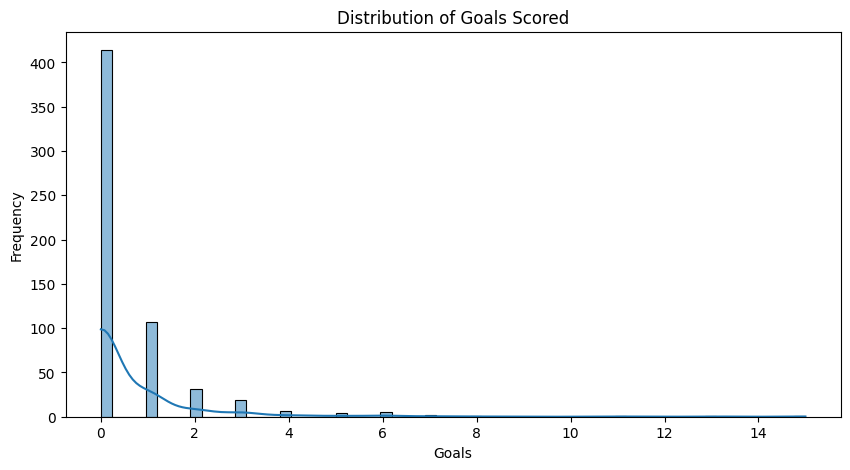

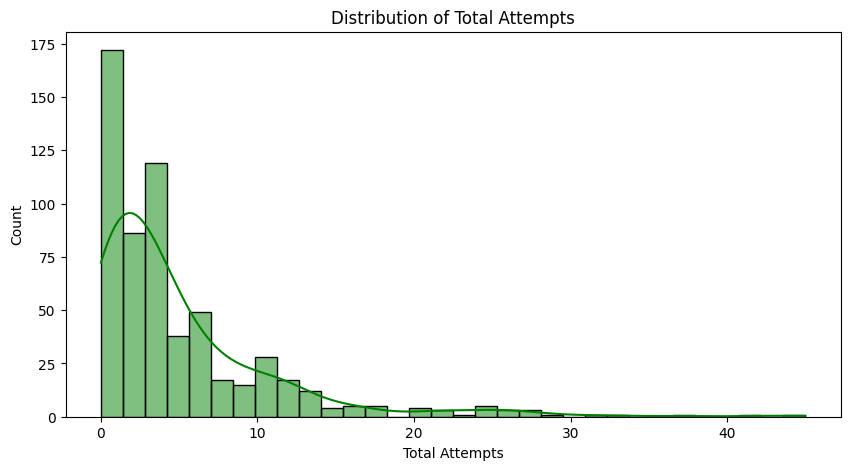

In [749]:

# histogram of goals scored
plt.figure(figsize=(10, 5))
sns.histplot(master_df['goals'], kde=True)  
plt.title('Distribution of Goals Scored')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()

# distribution of total attempts
plt.figure(figsize=(10, 5))
sns.histplot(master_df['total_attempts'], color='green', kde=True)  
plt.title('Distribution of Total Attempts')
plt.xlabel('Total Attempts')
plt.show()




### Scatter Plot Analysis:
The scatter plot of goals versus total attempts visually illustrates the relationship between the number of shots a player takes and the goals they score. From the plot, it is evident that there is a positive correlation between total attempts and goals scored. This suggests that players who attempt more shots tend to score more goals, highlighting the importance of offensive opportunities in game performance.

### Correlation Matrix Analysis:
The correlation matrix provides a comprehensive overview of the relationships between various player statistics. Key insights include:
- A strong positive correlation between minutes played and various performance metrics such as goals, assists, and total attempts, indicating that players who spend more time on the field generally have higher contributions in these areas.
- A notable positive correlation between pass accuracy and pass completions suggests efficient passing contributes significantly to game control and offensive setups.
- Defensive actions such as tackles and balls recovered are moderately correlated with fouls committed, suggesting that more aggressive or active defenders are likely to commit more fouls.

These findings can guide more focused training strategies and player evaluations, particularly by emphasizing the importance of shot opportunities and efficient passing in enhancing player and team performance.

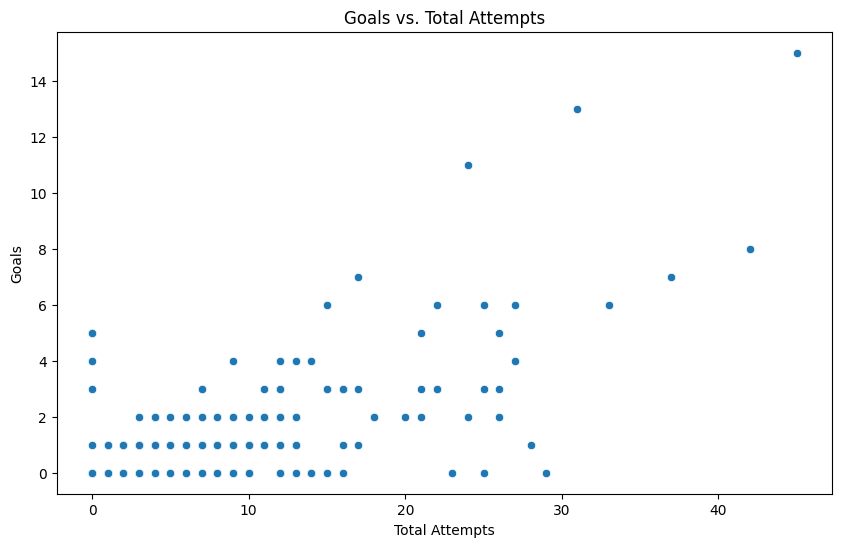

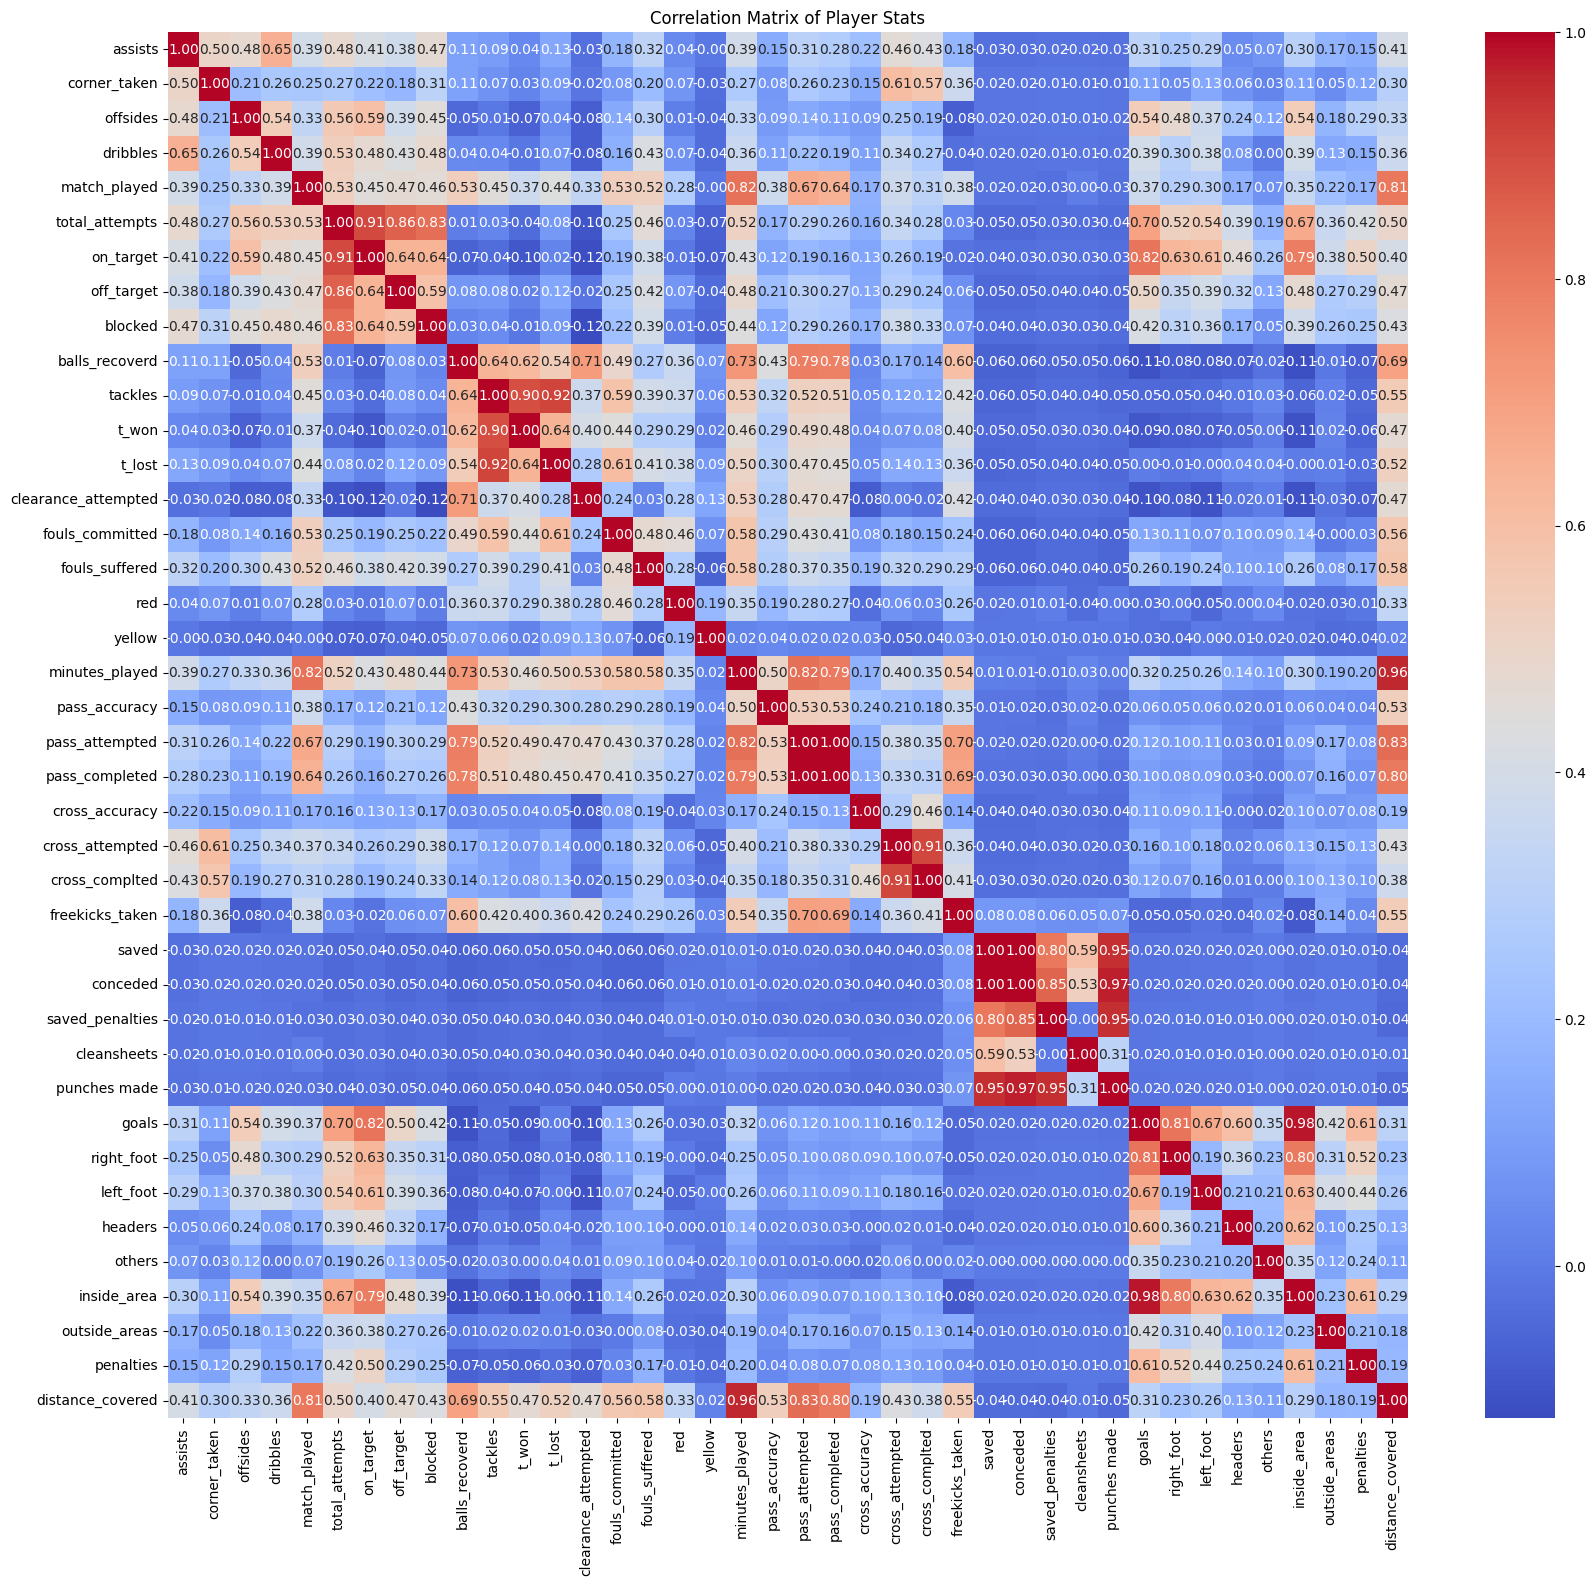

In [750]:
# scatter plot of goals vs total attempts
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_attempts', y='goals', data=master_df)
plt.title('Goals vs. Total Attempts')
plt.xlabel('Total Attempts')
plt.ylabel('Goals')
plt.show()

# exclude non-numeric columns before calculating correlation
numeric_columns = master_df.select_dtypes(include=[np.number])  
correlation_matrix = numeric_columns.corr()  

# plotting the correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Player Stats')
plt.show()



### Position-Specific Goal Analysis:
The bar chart titled "Average Goals by Position" provides a clear visual representation of how different player positions contribute to scoring within a team. Here’s a breakdown of the insights from this chart:
- **Forwards** tend to score the highest number of goals on average, which is expected as they are primarily responsible for finishing offensive plays.
- **Midfielders** also contribute significantly to the team's goal tally, reflecting their role in both creating and finishing scoring opportunities.
- **Defenders** and **Goalkeepers** have much lower goal averages, which aligns with their primary defensive responsibilities rather than scoring.

These statistics highlight the distinct roles within a team and underscore the importance of strategic positioning and role clarity in maximizing each player’s contributions to the team’s success. This analysis can help coaches and team managers better understand player effectiveness in various positions and adjust their game strategies and training programs accordingly.

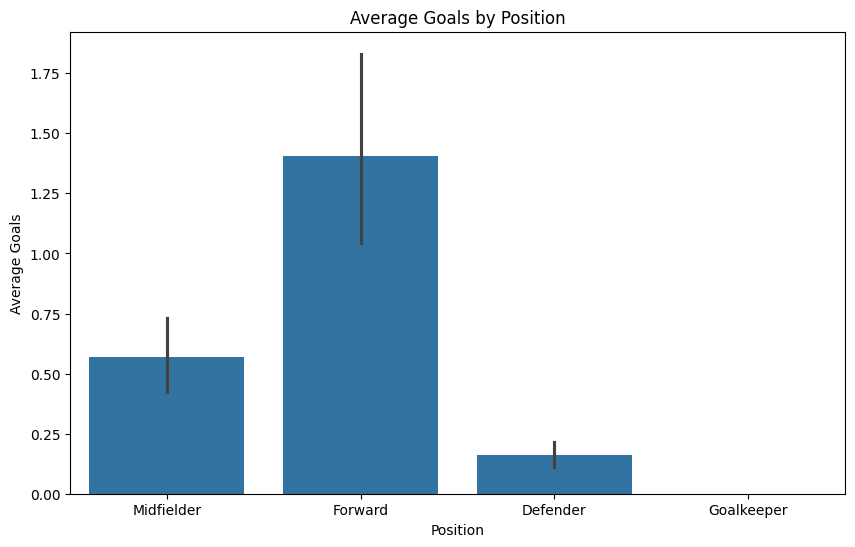

In [751]:
# average goals by position
plt.figure(figsize=(10, 6))
sns.barplot(x='position', y='goals', data=master_df, estimator=np.mean)
plt.title('Average Goals by Position')
plt.xlabel('Position')
plt.ylabel('Average Goals')
plt.show()



### Analysis of Goal Types:
The bar chart titled "Distribution of Goal Types" visually categorizes the goals scored into different types, offering insights into the predominant scoring techniques utilized by players. Here's a breakdown of what this chart illustrates:
- **Right Foot Goals**: The most common type of goal, highlighting that many players prefer using their dominant foot.
- **Left Foot Goals**: Slightly less common than right foot goals, indicating a preference but also showcasing the ambidexterity in play.
- **Headers**: Represent a significant portion but are less frequent than foot goals. This type could indicate the effectiveness of aerial ability in the league.
- **Others**: This category might include backheels, chest, and perhaps even accidental goals, which occur the least frequently.

This analysis helps in understanding the scoring dynamics and can aid coaches in focusing training on improving specific types of goal-scoring abilities based on the team's current stats. It also helps in scouting by identifying players with exceptional skills in less common goal types that might offer a tactical advantage.

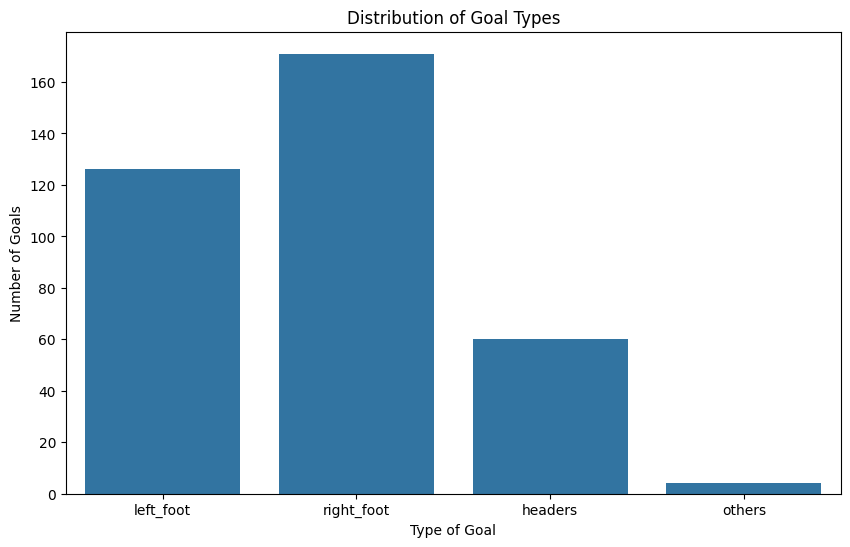

In [752]:
import matplotlib.pyplot as plt
import seaborn as sns

# create a DataFrame for goal types
goal_types = master_df[['left_foot', 'right_foot', 'headers', 'others']]
goal_types_sum = goal_types.sum().reset_index()
goal_types_sum.columns = ['Goal Type', 'Count']

# bar plot for goal types
plt.figure(figsize=(10, 6))
sns.barplot(x='Goal Type', y='Count', data=goal_types_sum)
plt.title('Distribution of Goal Types')
plt.ylabel('Number of Goals')
plt.xlabel('Type of Goal')
plt.show()



### Analysis of Goals by Location:
The bar chart titled "Goals Scored Inside vs. Outside the Area" provides a visual representation of where goals are predominantly scored during matches. Here are the key takeaways:
- **Inside the Area**: Significantly more goals are scored from within the penalty area, which underscores the importance of close-range finishing skills and the strategic focus on creating scoring opportunities close to the goal.
- **Outside the Area**: A smaller number of goals come from outside the penalty area, highlighting these events as less frequent but potentially spectacular moments in a game.

This analysis helps to emphasize the tactical aspects of football where positioning and precision in the final third are crucial for scoring. Coaches might use this data to reinforce strategies that exploit the penalty area more effectively, while also encouraging practices that could improve long-range shooting capabilities for situations that demand it. This insight is also beneficial for goalkeepers and defenders as it highlights the need to tighten defense inside the box and prepare for long-range shots.

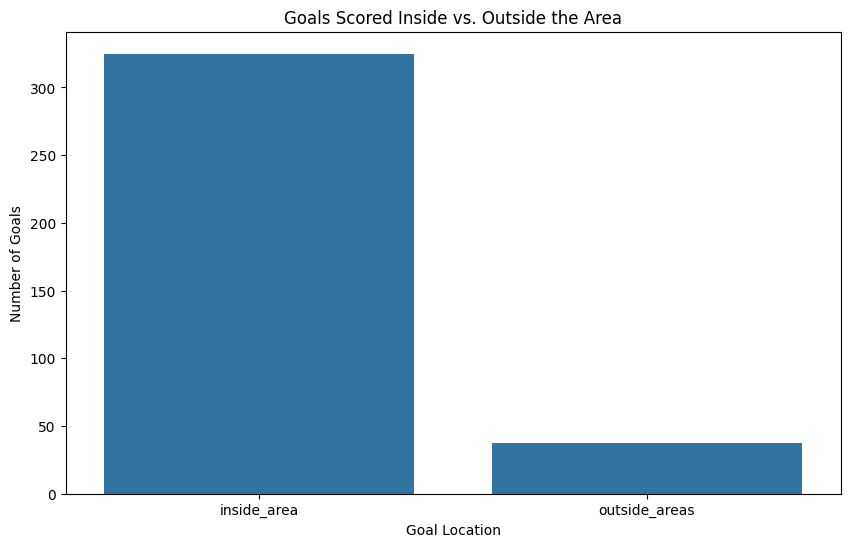

In [753]:
# create a DataFrame for goal locations
goal_locations = master_df[['inside_area', 'outside_areas']]
goal_locations_sum = goal_locations.sum().reset_index()
goal_locations_sum.columns = ['Location', 'Count']

# barplot for goal locations
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Count', data=goal_locations_sum)
plt.title('Goals Scored Inside vs. Outside the Area')
plt.ylabel('Number of Goals')
plt.xlabel('Goal Location')
plt.show()



### Analysis of Penalty Goals:
The histogram titled "Distribution of Penalty Goals" visualizes the frequency of goals scored from penalties. Here are the key insights:
- **High Frequency of Zero**: A significant majority of players have not scored from penalties, indicating that penalty opportunities are either rare or concentrated among a few players.
- **Decreasing Frequency for Higher Counts**: There are very few instances of players scoring multiple penalty goals, which reflects the special circumstances under which penalties are awarded and the specific role of designated penalty takers within teams.

This analysis underscores the importance of having skilled and reliable penalty takers on a team. It also highlights the strategic value of penalties in tight matches, where converting a single penalty can be decisive. Coaches and analysts might use this data to assess the effectiveness of their penalty takers and possibly scout for players who excel in these situations. This distribution also suggests a focus on training for penalty situations both for shooters and goalkeepers.

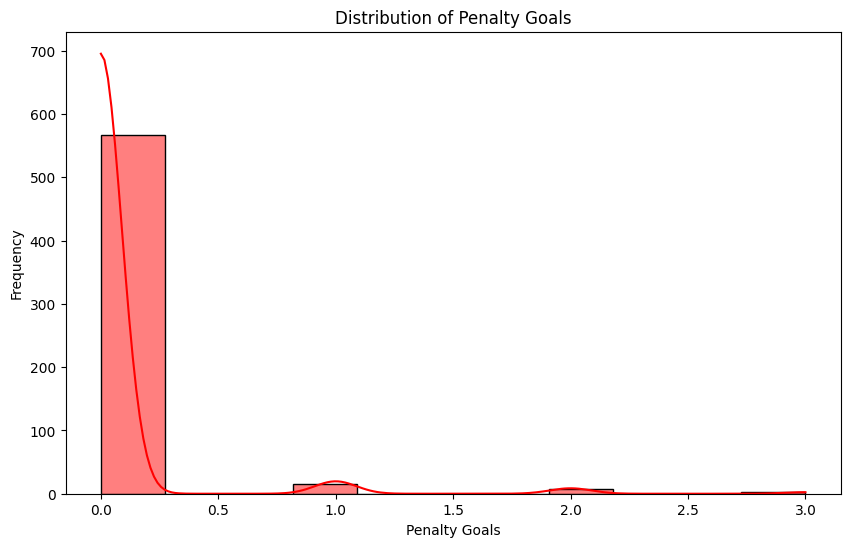

Total penalty goals scored: 36.0


In [754]:
# histogram for penalties
plt.figure(figsize=(10, 6))
sns.histplot(master_df['penalties'], color='red', kde=True)
plt.title('Distribution of Penalty Goals')
plt.xlabel('Penalty Goals')
plt.ylabel('Frequency')
plt.show()

# summarize penalties
total_penalties = master_df['penalties'].sum()
print(f"Total penalty goals scored: {total_penalties}")



1. **Fouls Committed vs. Fouls Suffered by Club**:
   - The scatter plot demonstrates the relationship between fouls committed and fouls suffered for various clubs. 
   - This visualization helps identify clubs that are more aggressive or more frequently targeted within the league, as indicated by the distribution of points. Clubs with a higher number of fouls committed or suffered might be engaged in more physical play styles.
   - It also allows for a comparative analysis between the defensive tactics and aggressiveness of different teams, potentially impacting their disciplinary records.

2. **Distribution of Red and Yellow Cards**:
   - The histogram provides a clear view of the distribution of red and yellow cards across the league. 
   - The frequency of yellow cards is significantly higher than red cards, suggesting that while aggressive play may be common, it rarely escalates to the level warranting a red card.
   - This plot can be used to understand the discipline level across the league, identifying teams or players that might pose disciplinary risks or are particularly disciplined in their play style.


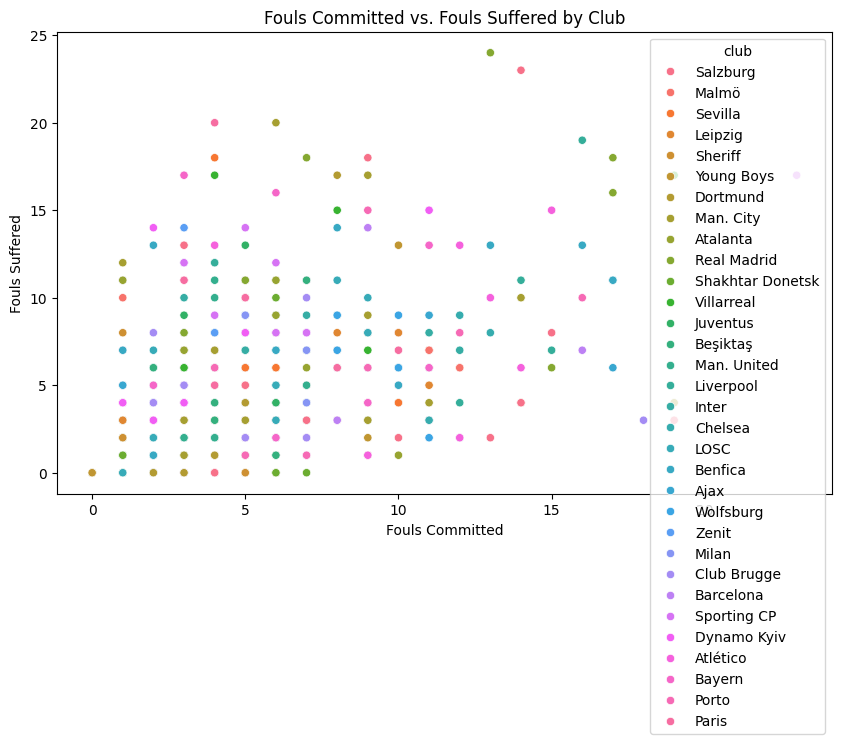

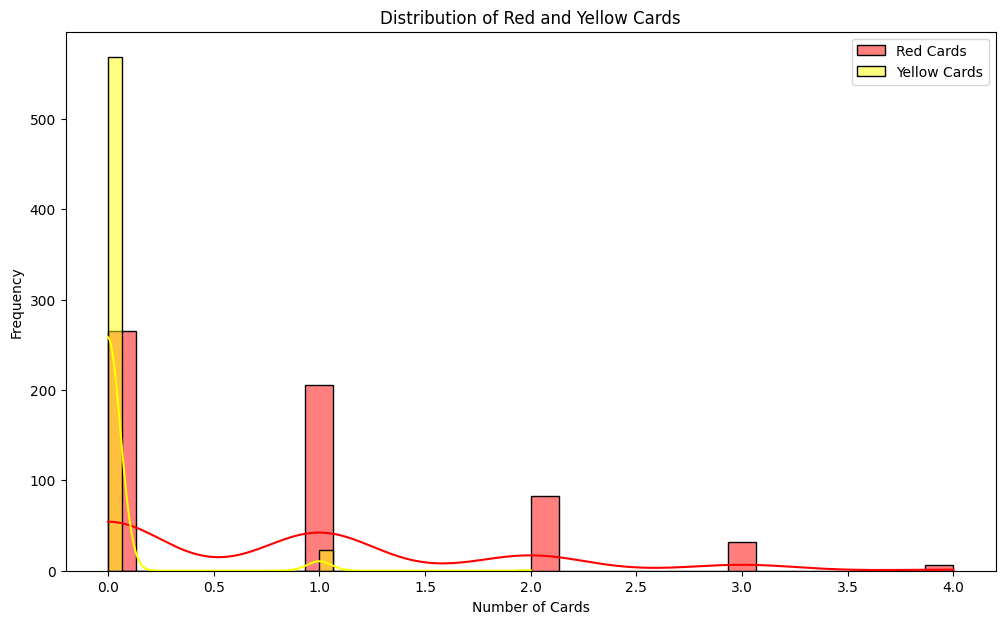

In [755]:
import seaborn as sns
import matplotlib.pyplot as plt

# fouls committed vs. fouls suffered
plt.figure(figsize=(10, 6))
sns.scatterplot(data=master_df, x='fouls_committed', y='fouls_suffered', hue='club')
plt.title('Fouls Committed vs. Fouls Suffered by Club')
plt.xlabel('Fouls Committed')
plt.ylabel('Fouls Suffered')
plt.show()

# frequency of red and yellow cards
plt.figure(figsize=(12, 7))
sns.histplot(data=master_df, x='red', bins=30, color='red', label='Red Cards', kde=True)
sns.histplot(data=master_df, x='yellow', bins=30, color='yellow', label='Yellow Cards', kde=True)
plt.title('Distribution of Red and Yellow Cards')
plt.xlabel('Number of Cards')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Impact of Playing Time on Goals Scored

The scatter plot above displays the relationship between the total minutes played by players and the number of goals they scored during the season. It highlights a trend where players with more playing time tend to score more goals, suggesting that increased field presence may correlate with higher scoring opportunities. This is particularly evident for a few players who have played over 800 minutes and scored upwards of 6 goals, indicating key players who significantly contribute to their team's offensive capabilities.

### Minutes Played vs Distance Covered

This scatter plot illustrates the relationship between the total minutes players have been on the field and the distance they have covered. The graph shows a strong positive correlation between these two metrics, indicating that as players spend more time on the pitch, their total distance covered also increases. This relationship is linear for the majority of players, highlighting consistent physical performance across different playtimes. The data may be useful for conditioning coaches and managers to assess player stamina and in-game activity levels.

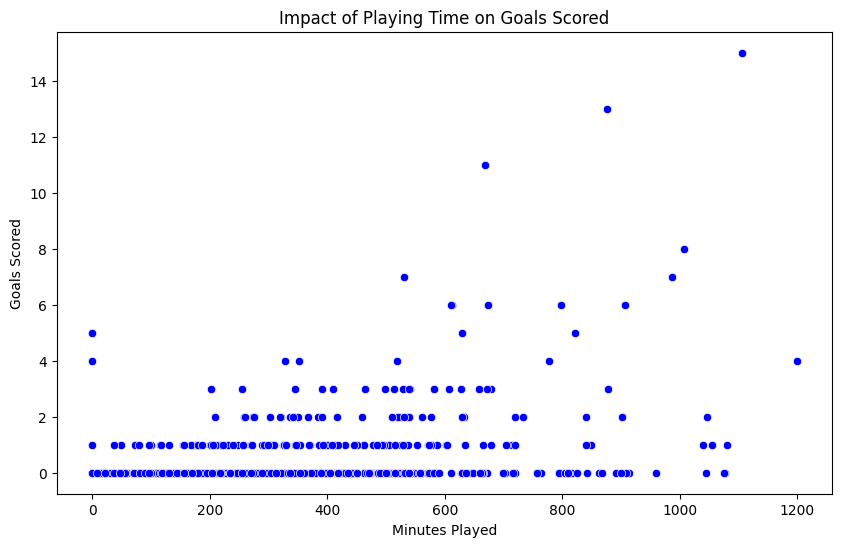

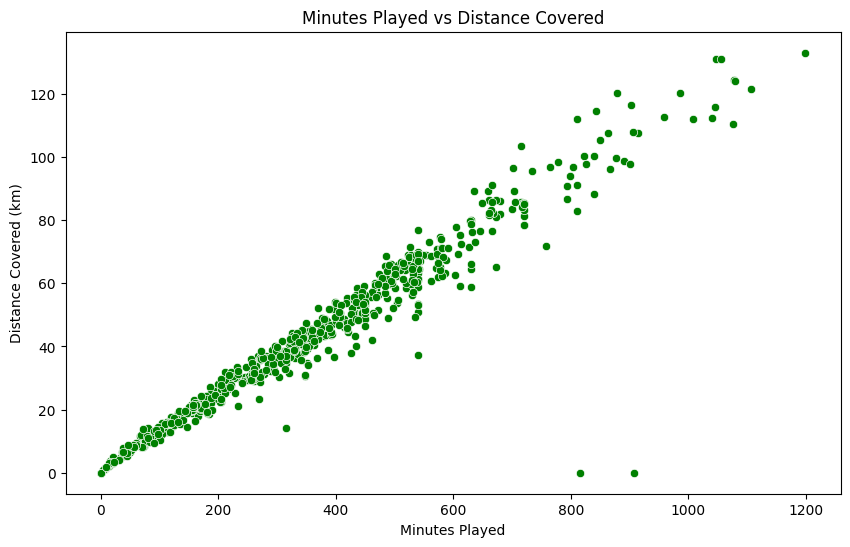

In [756]:
import pandas as pd

# convert columns to float
master_df['minutes_played'] = pd.to_numeric(master_df['minutes_played'], errors='coerce')
master_df['distance_covered'] = pd.to_numeric(master_df['distance_covered'], errors='coerce')

# scatter plot of minutes played vs goals scored
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minutes_played', y='goals', data=master_df, color='blue')
plt.title('Impact of Playing Time on Goals Scored')
plt.xlabel('Minutes Played')
plt.ylabel('Goals Scored')
plt.show()

# minutes played vs distance covered
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minutes_played', y='distance_covered', data=master_df, color='green')
plt.title('Minutes Played vs Distance Covered')
plt.xlabel('Minutes Played')
plt.ylabel('Distance Covered (km)')
plt.show()



### Average Assists by Position
This bar chart visualizes the average number of assists made by players across different positions. We observe that forwards and midfielders contribute significantly to creating goal opportunities, as indicated by their higher average assists. This suggests that these positions are crucial in offensive play, with midfielders slightly outperforming forwards in assisting capabilities. Defenders and goalkeepers show much lower averages, which aligns with their primary defensive responsibilities.

### Fouls Committed by Position
The violin plot illustrates the distribution of fouls committed by players according to their positions. It highlights that forwards and midfielders tend to commit more fouls compared to defenders and goalkeepers. The wider distributions for forwards and midfielders indicate a variation in play style, with some players engaging more aggressively than others. The plot shows that midfielders, while involved in creating plays, also partake actively in defensive actions, sometimes leading to fouls. In contrast, the narrow distribution for goalkeepers confirms fewer instances of fouls, which is expected given their limited interaction with outfield players.


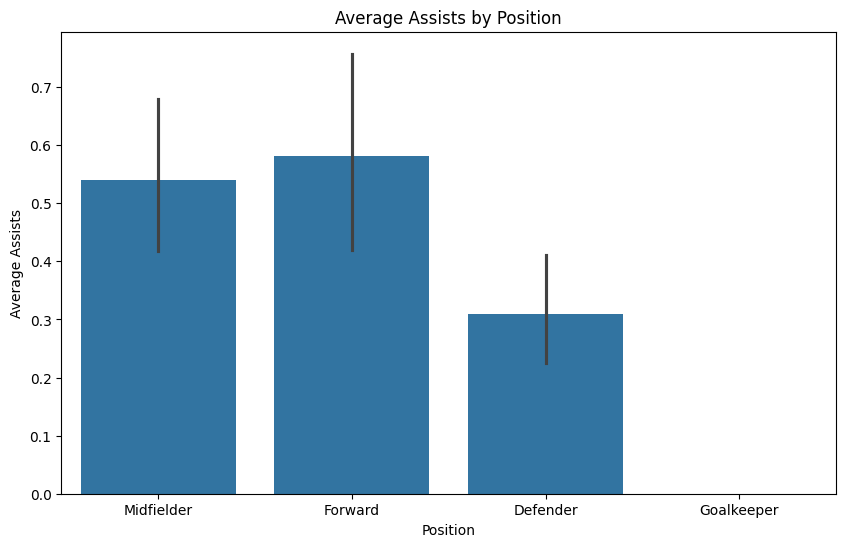

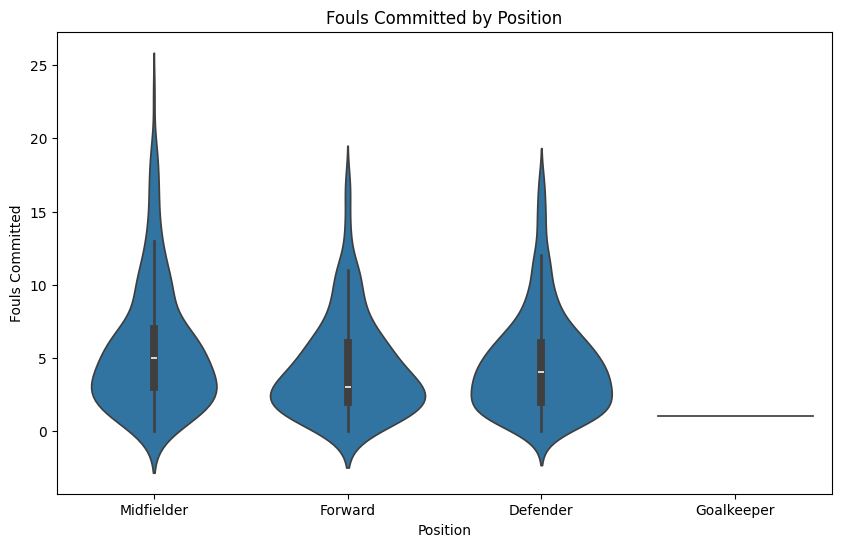

In [757]:

# bar plot of average assists by position
plt.figure(figsize=(10, 6))
sns.barplot(x='position', y='assists', data=master_df, estimator=np.mean)
plt.title('Average Assists by Position')
plt.xlabel('Position')
plt.ylabel('Average Assists')
plt.show()

# distribution of fouls committed by position
plt.figure(figsize=(10, 6))
sns.violinplot(x='position', y='fouls_committed', data=master_df)
plt.title('Fouls Committed by Position')
plt.xlabel('Position')
plt.ylabel('Fouls Committed')
plt.show()


### Goal Scoring Efficiency Analysis

This section evaluates player goal efficiency, which is defined as the ratio of goals scored to total attempts on goal. Goal efficiency is a crucial metric that helps in understanding a player's effectiveness in converting scoring opportunities into goals.

**Adjustments and Corrections:**
Before diving into the analysis, it was necessary to address inconsistencies in the dataset. Several players were showing goals scored without any recorded attempts, which is not feasible in practical scenarios. These entries were identified and excluded from the efficiency calculation to maintain data integrity and relevance.

**Analysis:**
After cleaning the dataset, the efficiency of goal scorers was calculated by dividing the number of goals by the total attempts. This metric gives us a percentage that represents how often a player scores when they attempt to. Players with higher efficiency are those who need fewer attempts to score, indicating higher precision or better opportunity utilization.

**Results:**
The results will showcase the top 10 players who are most efficient in front of goal, emphasizing those who maximize their scoring opportunities effectively. This analysis not only highlights the sharpshooters but also aids in tactical planning where efficiency can be prioritized over volume in certain strategic setups.

This approach ensures that the analysis remains focused on realistic and actionable insights, aligning with broader performance evaluation strategies in sports analytics.

In [758]:
# exclude entries where total_attempts are zero
filtered_df = master_df[master_df['total_attempts'] > 0].copy()

# calculate goal scoring efficiency
filtered_df['goal_efficiency'] = filtered_df['goals'] / filtered_df['total_attempts']

# display top 10 efficient goal scorers
top_scorers = filtered_df.sort_values(by='goal_efficiency', ascending=False).head(10)
print(top_scorers[['player_name', 'club', 'position', 'goals', 'total_attempts', 'goal_efficiency']])

        player_name         club    position  goals  total_attempts  \
354      Kulusevski     Juventus  Midfielder    1.0             1.0   
462         Montero     Beşiktaş    Defender    1.0             1.0   
333        Klaassen         Ajax  Midfielder    1.0             1.0   
332       Kjærgaard     Salzburg  Midfielder    1.0             1.0   
20      Alex Telles  Man. United    Defender    1.0             1.0   
560     Rafael Leão        Milan     Forward    1.0             1.0   
451  Messias Junior        Milan     Forward    1.0             1.0   
465          Morato      Benfica    Defender    1.0             1.0   
118       Chukwueze   Villarreal  Midfielder    2.0             3.0   
253       Greenwood  Man. United     Forward    1.0             2.0   

     goal_efficiency  
354         1.000000  
462         1.000000  
333         1.000000  
332         1.000000  
20          1.000000  
560         1.000000  
451         1.000000  
465         1.000000  
118        


**Defensive Metrics Per Match Analysis**

To better understand the defensive contributions of players across different matches, I calculated two key metrics: 'tackles per match' and 'balls recovered per match'. These metrics provide insights into the defensive activity and effectiveness of players, particularly defenders and midfielders who play pivotal roles in disrupting the opposition's attacks.

In the analysis, the `tackles_per_match` metric is computed by dividing the total number of tackles made by a player by the number of matches they played. Similarly, `balls_recovered_per_match` measures how many times a player successfully regained possession by recovering loose balls, normalized over the matches played.

Upon reviewing the top performers based on 'balls recovered per match', it becomes evident that certain defenders and midfielders stand out due to their consistent defensive efforts. For example, Koundé from Sevilla leads with an impressive average of 9.60 balls recovered per match, highlighting his keen positional sense and ability to read the game. This metric, coupled with tackles per match, helps identify players who are integral to their teams' defensive solidity.


In [759]:
# calculate per match defensive metrics
master_df['tackles_per_match'] = master_df['tackles'] / master_df['match_played']
master_df['balls_recovered_per_match'] = master_df['balls_recoverd'] / master_df['match_played']

# display top defenders
top_defenders = master_df.sort_values(by='balls_recovered_per_match', ascending=False).head(10)
print(top_defenders[['player_name', 'club', 'position', 'tackles_per_match', 'balls_recovered_per_match']])


    player_name              club    position  tackles_per_match  \
344      Koundé           Sevilla    Defender               0.00   
67       Bondar  Shakhtar Donetsk    Defender               0.00   
214    Fernando           Sevilla  Midfielder               0.50   
673       Tolói          Atalanta    Defender               1.50   
517    Palomino          Atalanta    Defender               1.20   
635       Souza          Beşiktaş  Midfielder               4.00   
703        Vida          Beşiktaş    Defender               0.50   
260  Guilavogui         Wolfsburg  Midfielder               1.20   
11       Akanji          Dortmund    Defender               1.00   
721    Welinton          Beşiktaş    Defender               3.25   

     balls_recovered_per_match  
344                       9.60  
67                        9.00  
214                       8.50  
673                       8.50  
517                       8.20  
635                       8.00  
703                 

In examining the contributions of players who lead in assists, it's insightful to consider not only the number of assists but also their pass efficiency. This metric highlights players who not only create scoring opportunities but also excel in their overall passing game, ensuring effective ball distribution and maintaining possession under pressure. For instance, Bruno Fernandes from Manchester United not only tops the assist chart with 7 assists but also shows a commendable pass efficiency of approximately 77%. Similarly, Luka Modrić from Real Madrid, while matching others with four assists, distinguishes himself with an impressive pass efficiency rate of over 90%, underscoring his pivotal role in midfield dynamics.

In [760]:
# calculate pass efficiency
master_df['pass_efficiency'] = master_df['pass_completed'] / master_df['pass_attempted']

# identify top players by assists and include pass efficiency
top_assist_providers = master_df.sort_values(by='assists', ascending=False).head(10)
print(top_assist_providers[['player_name', 'club', 'position', 'assists', 'pass_efficiency']])


          player_name         club    position  assists  pass_efficiency
87    Bruno Fernandes  Man. United  Midfielder      7.0         0.771605
606              Sané       Bayern  Midfielder      6.0         0.869347
705   Vinícius Júnior  Real Madrid     Forward      6.0         0.835920
30             Antony         Ajax     Forward      5.0         0.813665
311        João Mário      Benfica  Midfielder      4.0         0.902985
146         De Bruyne    Man. City  Midfielder      4.0         0.841310
100            Capoue   Villarreal  Midfielder      4.0         0.892057
437            Mbappé        Paris     Forward      4.0         0.856031
21   Alexander-Arnold    Liverpool    Defender      4.0         0.811679
459            Modrić  Real Madrid  Midfielder      4.0         0.904881


In this section, we explore the total offensive contributions of players in terms of goals and assists combined. By aggregating these two metrics, we identify the players who have had the most significant impact on their team's offensive performance during the season.

Robert Lewandowski and Karim Benzema stand out with the highest total contributions, each influencing 16 scoring plays for their teams. Lewandowski's 13 goals and 3 assists and Benzema's 15 goals and 1 assist underscore their pivotal roles as lead strikers, where not only do they finish opportunities, but they also create them.

The data also reveals the versatility of players like Leroy Sané and Vinícius Júnior, who equally balance their contributions between goals and assists, highlighting their dual-threat capabilities on the field. This analysis underscores the importance of multifaceted players who can adapt to various game situations, enhancing their team’s offensive dynamics.

Overall, this evaluation of total contributions is instrumental in assessing the direct impact players have on the game outcomes, serving as a key metric for both team strategy and player valuation.


In [761]:
# create a new column 'total_contributions' that sums goals and assists
master_df['total_contributions'] = master_df['goals'] + master_df['assists']

# sort the DataFrame 
top_forward_contributors = master_df.sort_values(by='total_contributions', ascending=False).head(10)
print(top_forward_contributors[['player_name', 'club', 'position', 'goals', 'assists', 'total_contributions']])


         player_name         club    position  goals  assists  \
376      Lewandowski       Bayern     Forward   13.0      3.0   
57           Benzema  Real Madrid     Forward   15.0      1.0   
606             Sané       Bayern  Midfielder    6.0      6.0   
272           Haller         Ajax     Forward   11.0      1.0   
602            Salah    Liverpool     Forward    8.0      2.0   
437           Mbappé        Paris     Forward    6.0      4.0   
705  Vinícius Júnior  Real Madrid     Forward    4.0      6.0   
401           Mahrez    Man. City  Midfielder    7.0      2.0   
141          Danjuma   Villarreal  Midfielder    6.0      2.0   
481           Müller       Bayern     Forward    4.0      3.0   

     total_contributions  
376                 16.0  
57                  16.0  
606                 12.0  
272                 12.0  
602                 10.0  
437                 10.0  
705                 10.0  
401                  9.0  
141                  8.0  
481           

This visualization examines the relationship between playing time and players' offensive contributions, specifically their goals scored and assists provided, across different positions. Each point represents a player, with their position indicated by color and symbol, and the size of the point proportional to the number of assists. 

The analysis clearly shows that forwards and midfielders generally contribute more goals, especially as their minutes played increase. It's also apparent that players with significant assists tend to have substantial playing time, reinforcing the notion that more time on the field often translates into more opportunities to impact the game.

Key outliers, such as forwards with exceptionally high goals with relatively lower playing time, could be indicative of highly efficient goal scorers. Conversely, players with substantial minutes but fewer goals or assists might be in roles that contribute in other ways not captured solely by these metrics.

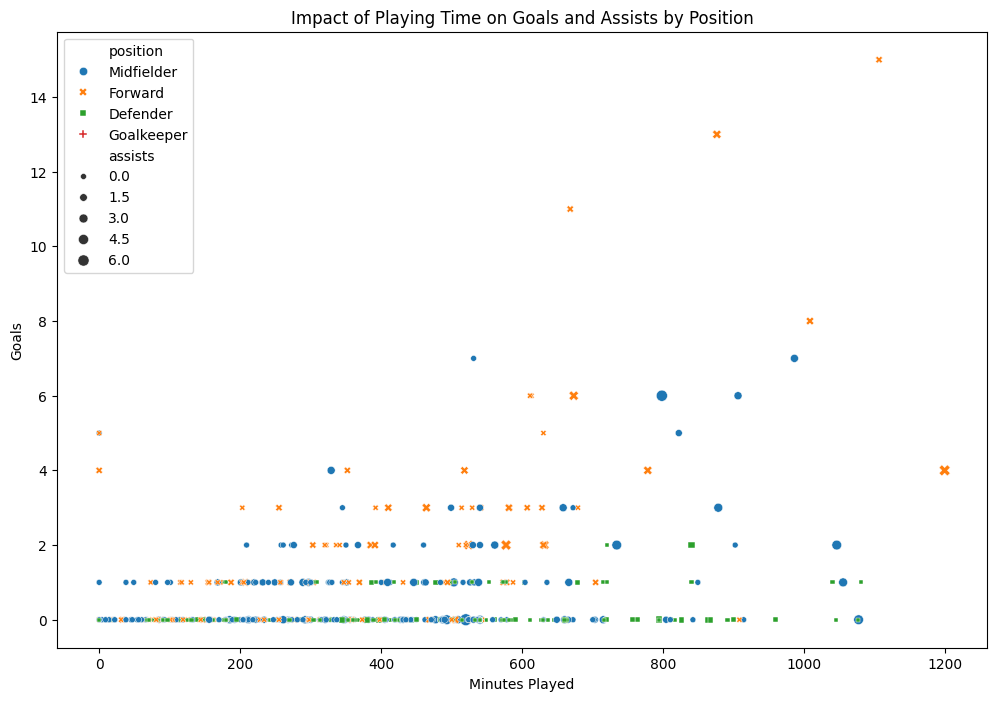

In [762]:
# analyze the impact of minutes played on goals and assists by position
plt.figure(figsize=(12, 8))
sns.scatterplot(x='minutes_played', y='goals', hue='position', style='position', size='assists', data=master_df)
plt.title('Impact of Playing Time on Goals and Assists by Position')
plt.xlabel('Minutes Played')
plt.ylabel('Goals')
plt.legend(loc='upper left')
plt.show()



### Forward Position Predictive Modeling

In this section, we develop a predictive model to forecast the total contributions (goals plus assists) of forwards based on their playing statistics. The model aims to identify how well we can predict a forward's impact on the game using their performance metrics.

#### Model Development:
1. **Feature Selection**: We chose the features `total_attempts`, `on_target`, `minutes_played`, and `pass_completed`. These features are selected based on the assumption that they directly influence a forward's ability to score or assist.
2. **Data Preparation**: We split our data into training and testing sets with an 80/20 ratio, ensuring that our model can be validated against unseen data.
3. **Model Building**: We employed a Linear Regression model due to its simplicity and interpretability, which is ideal for demonstration purposes in this tutorial.
4. **Model Fitting**: The model is trained on the training dataset, which involves finding the best coefficients for our features that minimize errors in predicting the target variable.

#### Results:
- The Mean Squared Error (MSE) of the model on the test set is approximately 2.694. This metric tells us how close the predicted values are to the actual values, with a lower score indicating better performance. Here, the MSE suggests that our model, while simplistic, captures a reasonable amount of variance in forward contributions but also highlights the potential for improvement.

#### Interpretation:
- The MSE value provides an indication of the average squared difference between the predicted and actual contributions. Given the context of football data, an MSE of around 2.694 might be acceptable for preliminary models but requires further refinement for professional analytical use.
- The use of features like `minutes_played` and `total_attempts` suggests that as forwards participate more in the game and take more shots, their likelihood of contributing through goals or assists increases.

#### Next Steps:
- **Model Enhancement**: We can improve the model's performance by incorporating more complex features or using more sophisticated modeling techniques like ensemble methods or neural networks.
- **Feature Engineering**: Consider deriving new features that capture more nuances, such as shot accuracy percentage or involvement in key plays, to see if they provide additional predictive power.
- **Cross-Validation**: Implement k-fold cross-validation to ensure that our model's performance is robust and not dependent on the particular split of the data used.



In [763]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# create a new target column 'total_contributions' for forwards
master_df.loc[master_df['position'] == 'Forward', 'total_contributions'] = master_df['goals'] + master_df['assists']

# selecting features and the target
forward_features = master_df[master_df['position'] == 'Forward'][['total_attempts', 'on_target', 'minutes_played', 'pass_completed']]
forward_contributions = master_df[master_df['position'] == 'Forward']['total_contributions']

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(forward_features, forward_contributions, test_size=0.2, random_state=42)

# building the model for forwards
model_forward = LinearRegression()
model_forward.fit(X_train, y_train)
y_pred = model_forward.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Forward Position - Mean Squared Error:", mse)


Forward Position - Mean Squared Error: 2.693939946343747



### Midfielder Position Predictive Modeling

In this part of the tutorial, we focus on building a predictive model for midfielders to estimate their total contributions (goals plus assists) based on selected performance metrics. This model seeks to quantify the impact midfielders have on matches through their offensive contributions.

#### Model Development:
1. **Feature Selection**: We chose `minutes_played`, `total_attempts`, and `pass_completed` as features. These were selected because they represent significant aspects of a midfielder's game that could influence their scoring and assisting abilities.
2. **Data Preparation**: The dataset was divided into training (70%) and testing (30%) sets. This split helps in validating the model's effectiveness on unseen data.
3. **Model Building**: A Linear Regression model was utilized for its simplicity and for educational purposes within this tutorial. Linear Regression provides a good starting point for regression problems.
4. **Model Fitting**: The model was trained using the training set, aiming to find the best linear relationship between the selected features and the midfielder's total contributions.

#### Results:
- The Mean Squared Error (MSE) for the model is approximately 1.206. This metric measures the average of the squares of the errors, indicating the difference between the observed and predicted values. A lower MSE is better, as it indicates that the model can predict more accurately.

#### Interpretation:
- The MSE of 1.206 suggests that the model can reasonably predict the total contributions of midfielders from their gameplay statistics, though like any model, it could benefit from further refinement.
- The features chosen indicate that the more a midfielder is involved in the game, both in terms of playing time and ball handling (passes and attempts), the more likely they are to contribute to goals and assists.

#### Next Steps:
- **Enhancing the Model**: To improve prediction accuracy, we might consider incorporating more features such as player fitness levels, match context (home vs. away), or more detailed passing statistics.
- **Advanced Techniques**: Exploring other modeling techniques like Decision Trees, Random Forest, or even neural networks could yield better predictive performance.
- **Feature Engineering**: Experimenting with interactions between features or polynomial features could capture more complex relationships that affect midfielder performances.


In [764]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# filter data for midfielders
midfielders = master_df[master_df['position'] == 'Midfielder'].copy()

# create a new target column 
midfielders['total_contributions'] = midfielders['goals'] + midfielders['assists']

# selecting features and the new target
features = midfielders[['minutes_played', 'total_attempts', 'pass_completed']]
target = midfielders['total_contributions']

# split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# predicting the test set results
predictions = model.predict(X_test)

# calculate the MSE
mse = mean_squared_error(y_test, predictions)
print("Midfielder Position - Mean Squared Error:", mse)


Midfielder Position - Mean Squared Error:

 1.205830614483718



### Defensive Contributions Predictive Modeling

In this part of the tutorial, we delve into predictive modeling for defenders, focusing on their defensive contributions based on various match-related statistics. The primary goal here is to estimate a defender's total contributions, defined as the sum of assists, tackles, and balls recovered.

#### Initial Linear Regression Model:
- **Model Development**: We initially applied a Linear Regression model using features such as `minutes_played`, `clearance_attempted`, `pass_completed`, and `distance_covered`.
- **Model Performance**: The initial model resulted in a high Mean Squared Error (MSE) of 63.36, indicating substantial prediction errors. This suggested that our model might benefit from refinement either in feature selection or model complexity.


In [765]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# create a new target 'defensive_contributions' for defenders
master_df.loc[master_df['position'] == 'Defender', 'defensive_contributions'] = master_df['assists'] + master_df['tackles'] + master_df['balls_recoverd']

# selecting features and the new target
defender_features = master_df[master_df['position'] == 'Defender'][['minutes_played', 'clearance_attempted', 'pass_completed', 'distance_covered']]
defender_contributions = master_df[master_df['position'] == 'Defender']['defensive_contributions']

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(defender_features, defender_contributions, test_size=0.2, random_state=42)

# building the model for defenders
model_defender = LinearRegression()
model_defender.fit(X_train, y_train)
y_pred = model_defender.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Defender Position - Mean Squared Error:", mse)


Defender Position - Mean Squared Error: 63.35822723321757



#### Refinement with Random Forest and Feature Importance Analysis:
- **Random Forest Implementation**: To address the high MSE, we implemented a Random Forest Regressor, which is more adept at handling non-linear relationships and interactions between features.
- **Feature Importance Analysis**: Upon fitting the Random Forest model, we conducted a feature importance analysis to understand which features contribute most significantly to predicting defensive contributions. This analysis revealed that `minutes_played` was overwhelmingly the most significant predictor, while other features like `distance_covered` and `pass_completed` contributed less.

#### Key Insights and Next Steps:
- **Feature Selection**: The analysis indicates that future model refinements could focus on features closely tied to active gameplay minutes and possibly incorporate additional metrics such as positional data or advanced defensive metrics not currently in the dataset.
- **Model Complexity**: While the Random Forest model provided more insight into feature importance, exploring other complex models or feature engineering might yield better predictions.

#### Conclusion:
This exploration highlights the complexities of predictive modeling in sports analytics, especially concerning defensive actions in soccer. By iteratively refining our model and focusing on the most impactful features, we gain better insights into what drives defensive contributions on the field.

#### Visualization:
The feature importance graph visually represents the contribution of each feature to the model, underscoring the dominance of minutes played over other features.


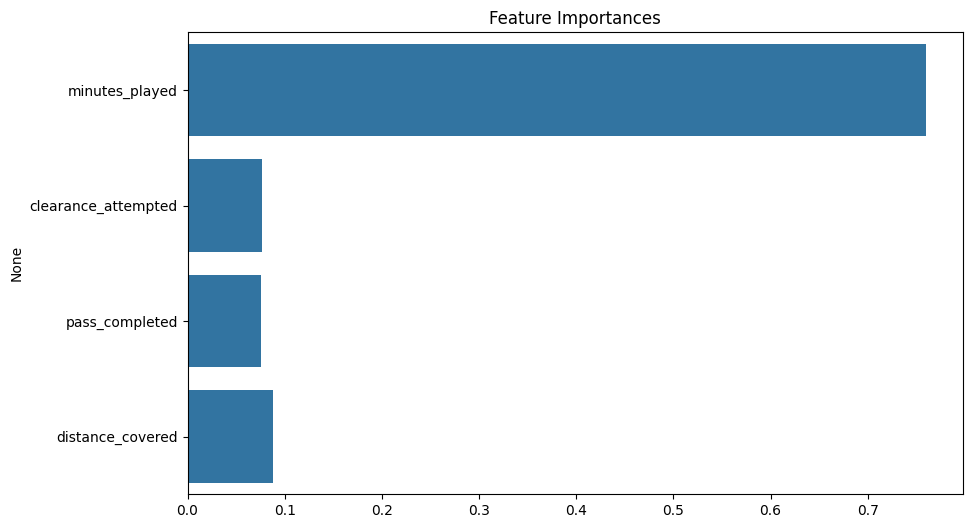

In [766]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns


# setting up the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# calculate correlation with the target
correlation_matrix = defender_features.corrwith(defender_contributions)

# set a threshold for low correlations
threshold = 0.1

# identify features with correlation below the threshold
low_corr_features = correlation_matrix[correlation_matrix.abs() < threshold].index.tolist()

# ensure only valid columns are dropped
valid_drop_columns = [col for col in low_corr_features if col in defender_features.columns]

# drop low correlation features
features = defender_features.drop(columns=valid_drop_columns)

# fit the model
rf_model.fit(features, defender_contributions)

# get feature importances
importances = rf_model.feature_importances_
feature_names = features.columns

# plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances')
plt.show()



### Conclusion

This tutorial has journeyed through the multifaceted world of soccer analytics, using data-driven techniques to uncover player performances, predict outcomes, and gain insights that are not immediately obvious through traditional statistics alone. Through our exploratory data analysis, we identified key patterns and anomalies in player behaviors, which informed our subsequent predictive modeling.

Our models for different player positions, from forwards to defenders, highlighted the unique contributions of players to their teams. The predictive models we developed help in forecasting player impacts, offering valuable tools for team management and match strategy.

The challenges encountered, particularly in feature selection and model accuracy, underscore the complexity of sports analytics. However, the iterative process of refining our models led to improved understandings and refined strategies for data handling.

As soccer continues to evolve, so too will the methodologies used to analyze it. This tutorial only scratches the surface. The future of sports analytics will likely see a greater integration of biometric data, enhanced player tracking, and real-time data utilization, further revolutionizing how we understand and enjoy the beautiful game.

For those interested in further exploration, I encourage diving into the resources provided and continuing to experiment with your own datasets. 


## Extra Resources

1. **Soccermatics Course**: This course teaches advanced mathematics and statistics applied to soccer, providing a deeper understanding of the game through data analysis. It's ideal for those looking to dive into detailed soccer analytics. More details are available on [Soccermatics](https://soccermatics.readthedocs.io/en/latest/).

2. **DataCamp's Soccer Analytics Resources**: DataCamp offers various tutorials and classes that relate directly to data science applications in sports, including soccer. These can help you explore machine learning techniques and data analysis further. Explore more on [DataCamp's website](https://www.datacamp.com/).

3. **Friends of Tracking**: This initiative involves tutorials and discussions by data scientists from major soccer clubs and academics. It's a resource for learning about the latest methods in tracking data analysis in soccer. You can watch their sessions on the [Friends of Tracking YouTube channel](https://www.youtube.com/channel/UCUB9C85WhFNCwBrjw3fTIzA).

